In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import numpy as np

# MNIST 데이터셋 로드
#load data from mnist dataset
mnist = fetch_openml("mnist_784", version=1)
X = mnist.data
y = mnist.target.astype(int)
print(X.shape) #print shape of that data

(70000, 784)


In [ ]:

#data standarization/ 0 or 1 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #computer mean n std and apply it data 

#sampling 3000 data randomly
rand_index = np.random.choice(X.shape[0], 3000) 
X_scaled_sampled = X_scaled[rand_index] 
y_sampled = y[rand_index] # keep label

(3000, 2)


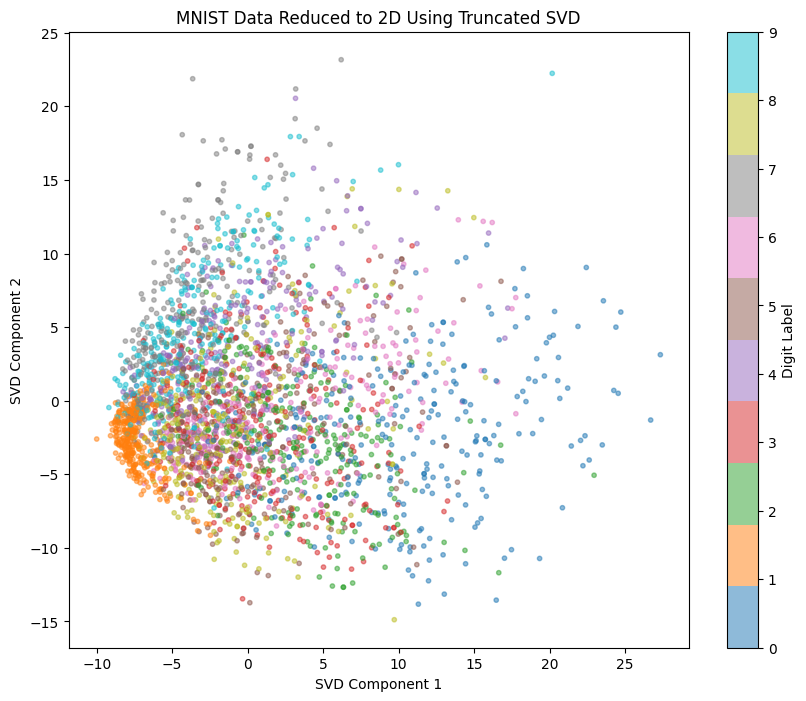

In [ ]:
# TruncatedSVD를 사용하여 2차원으로 축소
#use truncatedSVD to dimension reduction to 2d
svd = TruncatedSVD(n_components=2, random_state=42)
X_reduced = svd.fit_transform(X_scaled_sampled) #reduce and apply it to data
print(X_reduced.shape) #reduced from (70000, 784) to (3000, 2)

# 시각화
#visualization use scatter
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    X_reduced[:, 0], X_reduced[:, 1], c=y_sampled, cmap="tab10", alpha=0.5, s=10
)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("MNIST Data Reduced to 2D Using Truncated SVD")
plt.show()

(3000, 2)


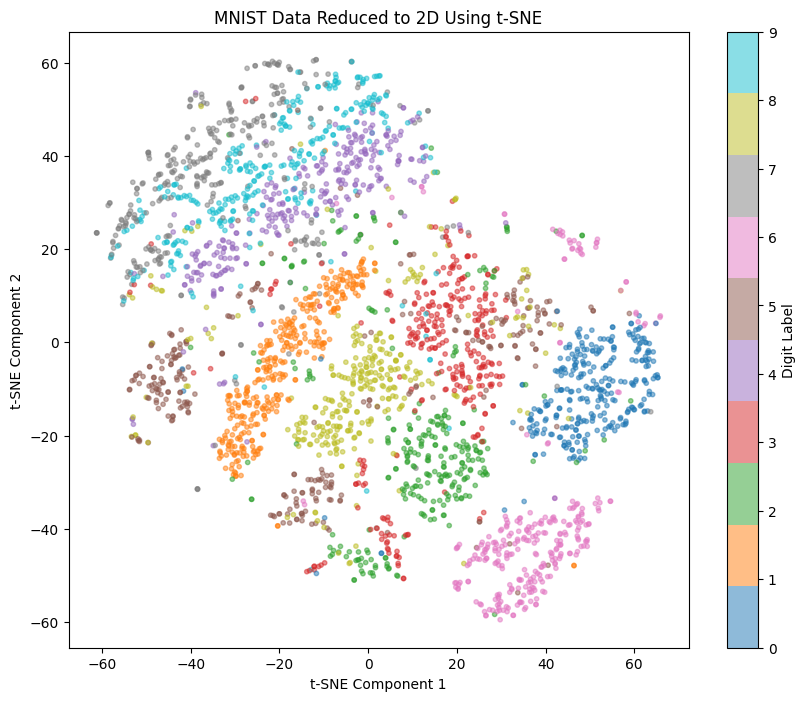

In [ ]:
from sklearn.manifold import TSNE

#tsne reduce non linear
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_scaled_sampled) #reduce and apply to data
print(X_reduced.shape)

# 시각화
plt.figure(figsize=(10, 8))
scatter = plt.scatter( 
    X_reduced[:, 0], X_reduced[:, 1], c=y_sampled, cmap="tab10", alpha=0.5, s=10
)
plt.colorbar(scatter, label="Digit Label")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("MNIST Data Reduced to 2D Using t-SNE")
plt.show()